# Pizza Place Analysis

A year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas, served, with additional details on the type, size, quantity, price, and ingredients.

## Recommended Analysis
1. What is the total revenue/sales?
2. Find the total quantity sold.
3. Find the total orders.
4. How many pizza types do they sell?
5. Find the average price of the pizzas.
6. What are the peak hours of sales?
7. Find the total sales made on each day of the week. Which day of the week is when sales are made the most?
8. Find the top 5 bestselling pizzas.
9. Find the sales made in each month. Any trend noticeable?
10. Are there pizza types that are not doing well on the menu?


# Import libraries

In [1]:
# Libraries Used for the Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading and Inspection

In [2]:
orders = pd.read_csv("orders.csv")
order_details = pd.read_csv("order_details.csv")
pizzas = pd.read_csv("pizzas.csv")
pizza_types = pd.read_csv("pizza_types.csv", encoding='latin1') # specifying the encoding 

In [3]:
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [4]:
orders.shape

(21350, 3)

In [5]:
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [6]:
order_details.shape

(48620, 4)

In [7]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [8]:
pizzas.shape

(96, 4)

In [9]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [10]:
pizza_types.shape

(32, 4)

In [11]:
# Copy of the data for the analysis
df1 = orders.copy()
df2 = order_details.copy()
df3 = pizzas.copy()
df4 = pizza_types.copy()

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [15]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


Points from the above summary;
1. df1 & df2 are big data file ( 21350 entries & 48620 entries respectively)
2. There is no null value

In [16]:
df1.columns

Index(['order_id', 'date', 'time'], dtype='object')

In [17]:
df2.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity'], dtype='object')

In [18]:
df3.columns

Index(['pizza_id', 'pizza_type_id', 'size', 'price'], dtype='object')

In [19]:
df4.columns

Index(['pizza_type_id', 'name', 'category', 'ingredients'], dtype='object')

### Merge All DataFrames into One

In [20]:
# Merge order_details with orders
df = df2.merge(df1, on="order_id")

# Merge with pizzas
df = df.merge(df3, on="pizza_id")

# Merge with pizza_types
df = df.merge(df4, on="pizza_type_id")

In [21]:
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [23]:
df.shape

(48620, 12)

In [24]:
df.describe()

,order_details_id,order_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132
std,14035.529381,6180.119770,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000
max,48620.000000,21350.000000,4.000000,35.950000


### Clean and Prepare the Data

In [25]:
# Convert date and time columns
df["date"] = pd.to_datetime(df["date"])
df["time"] = pd.to_datetime(df["time"], format="%H:%M:%S").dt.time
df["datetime"] = pd.to_datetime(df["date"].astype(str) + " " + df["time"].astype(str))
df["hour"] = df["datetime"].dt.hour

In [26]:
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,datetime,hour
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01 11:38:36,11
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-02 12:22:46,12
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-03 14:22:10,14
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-03 16:54:54,16
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-04 20:55:29,20


### ANALYSIS SECTION

#### 1. Total Revenue 

In [27]:
total_revenue = df["price"].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $801,944.70


#### 2. Total Quantity Sold

In [28]:
total_quantity = df["quantity"].sum()
print(f"Total Quantity Sold: {total_quantity}")

Total Quantity Sold: 49574


#### 3. Total Orders

In [29]:
total_orders = df["order_id"].nunique()
print(f"Total Orders: {total_orders}")

Total Orders: 21350


#### 4. Number of Pizza Types

In [30]:
pizza_type_count = df["pizza_type_id"].nunique()
print(f"Total Pizza Types Sold: {pizza_type_count}")

Total Pizza Types Sold: 32


#### 5. Average Pizza Price

In [31]:
average_price = df["price"].mean()
print(f"Average Pizza Price: ${average_price:.2f}")

Average Pizza Price: $16.49


#### 6. Peak Sales Hours

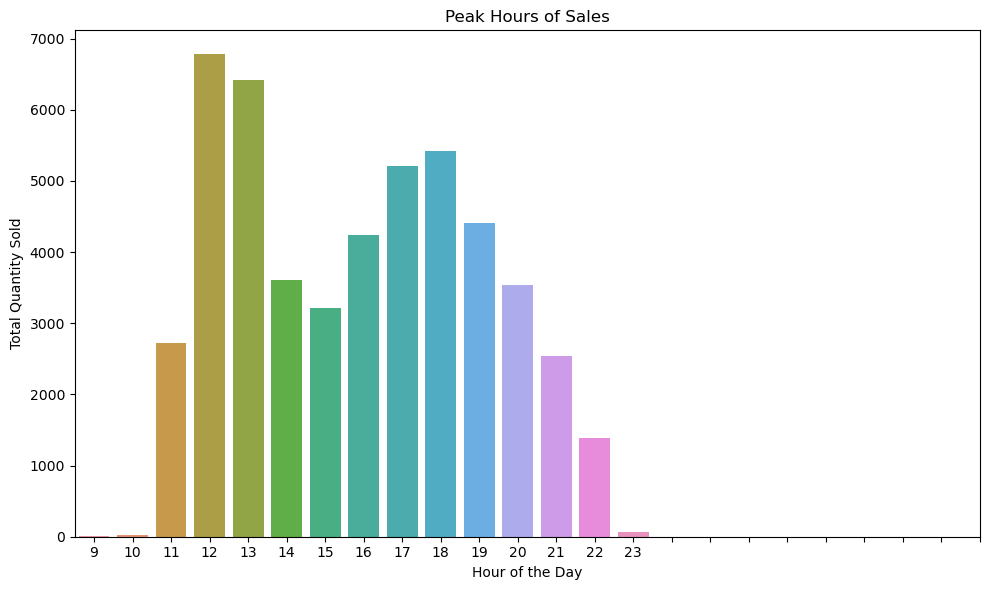

In [32]:
# Peak Hours of Sales
peak_hours = df.groupby("hour")["quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=peak_hours.index, y=peak_hours.values)
plt.title("Peak Hours of Sales")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Quantity Sold")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

#### 7. Sales by Day of Week

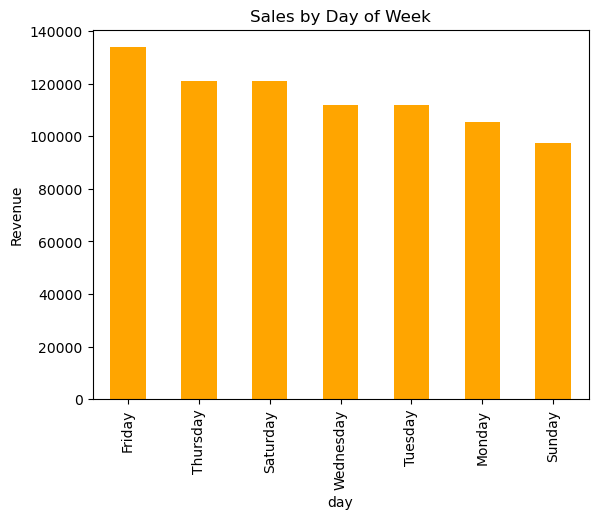

In [33]:
df["day"] = df["date"].dt.day_name()
sales_by_day = df.groupby("day")["price"].sum().sort_values(ascending=False)
sales_by_day.plot(kind="bar", title="Sales by Day of Week", color='orange')
plt.ylabel("Revenue")
plt.show()

#### 8. Top 5 Bestselling Pizzas

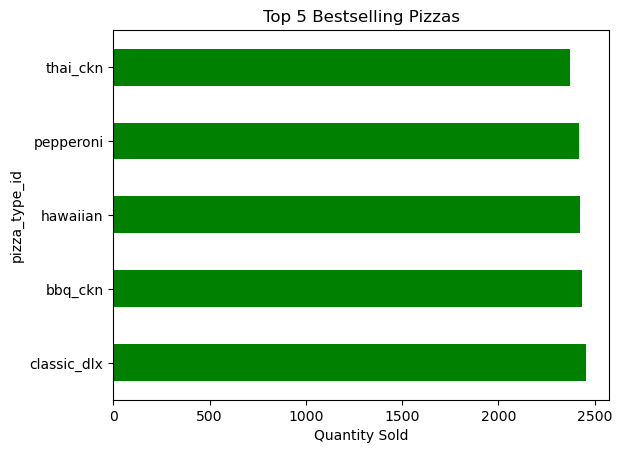

In [34]:
top_5 = df.groupby("pizza_type_id")["quantity"].sum().sort_values(ascending=False).head(5)
top_5.plot(kind="barh", title="Top 5 Bestselling Pizzas", color='green')
plt.xlabel("Quantity Sold")
plt.show()

#### 9. Monthly Sales Trends

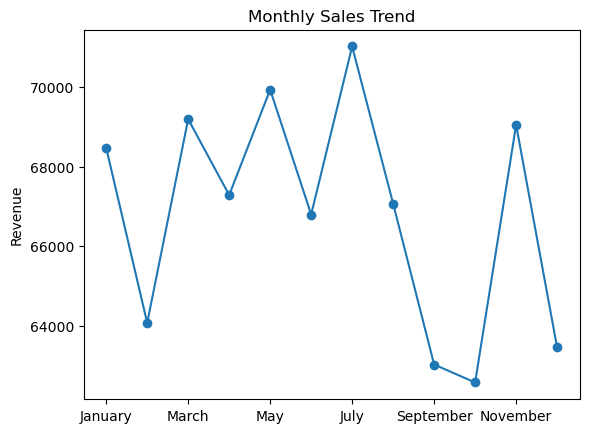

In [35]:
df["month"] = df["date"].dt.month_name()
monthly_sales = df.groupby("month")["price"].sum()
monthly_sales = monthly_sales.loc[pd.date_range('2021-01-01', periods=12, freq='MS').month_name()]
monthly_sales.plot(kind="line", marker="o", title="Monthly Sales Trend")
plt.ylabel("Revenue")
plt.show()

#### 10. Low-Performing Pizzas

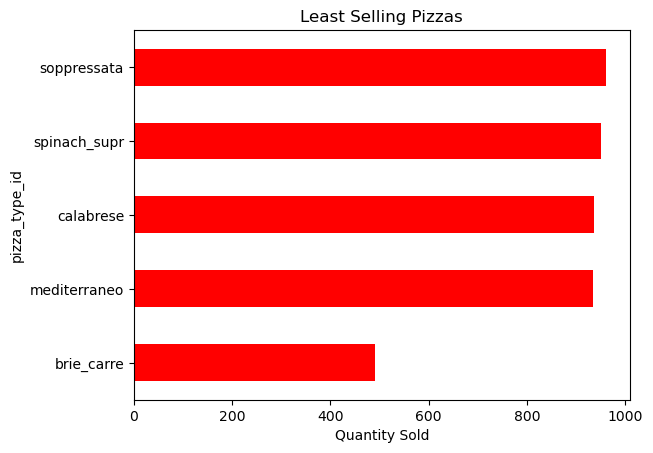

In [36]:
low_sales = df.groupby("pizza_type_id")["quantity"].sum().sort_values().head(5)
low_sales.plot(kind="barh", title="Least Selling Pizzas", color='red')
plt.xlabel("Quantity Sold")
plt.show()

## Additional Insights

1. Overall selas of pizza's in term of revenue and count, shows increase in months of non-holidays
2. The dataset was from USA(price in doller)in holiday months there were slitly decrease in pizza sales as shown in above graph.(sept.,oct.,& dec.) Columbus Day - October ,Veterans Day - November ,Thanksgiving Day - November ,Christmas Day - December,New Year's Day - January

Are there any pizzas we should take off the menu, or any promotions we could leverage?

In [37]:
low_sales.sort_values(ascending =True).head(10)

pizza_type_id
brie_carre      490
mediterraneo    934
calabrese       937
spinach_supr    950
soppressata     961
Name: quantity, dtype: int64

## Summary

The analysis of pizza place sales data provides actionable insights for improving operations, marketing strategies, and menu offerings. By leveraging these findings, the pizza place can enhance customer satisfaction, drive sales, and ultimately optimize business performance.